# Tilke Tutorial

## Basic Usage

### Generating a Circuit:

In [1]:
from tilke import Circuit

In [2]:
sample = Circuit()

### Plotting a Circuit:

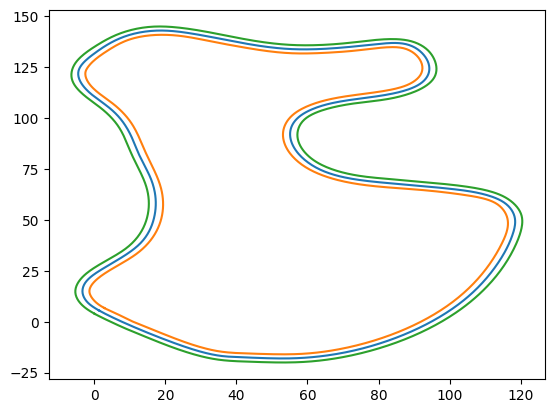

In [3]:
sample.plot()

### Adding cones to the circuit

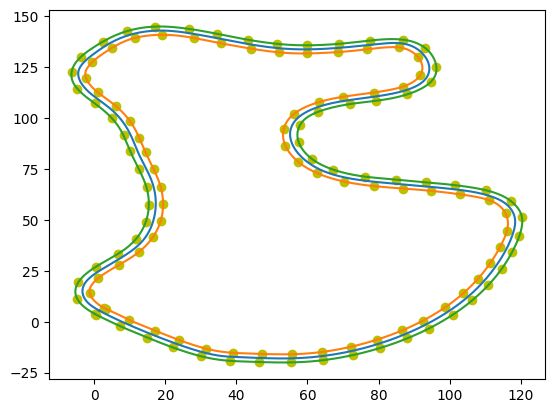

In [4]:
sample.populate_circuit()
sample.plot()

### Adding error to cone populations to simulate cone detection outputs

In [5]:
sample.contaminate_cone_population()

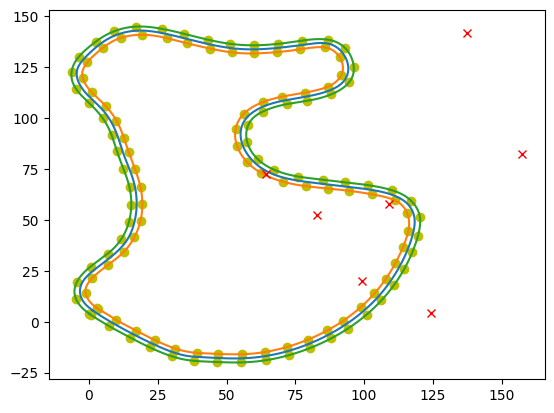

In [6]:
sample.plot()

### Getting Images of Circuit, Track, Cones

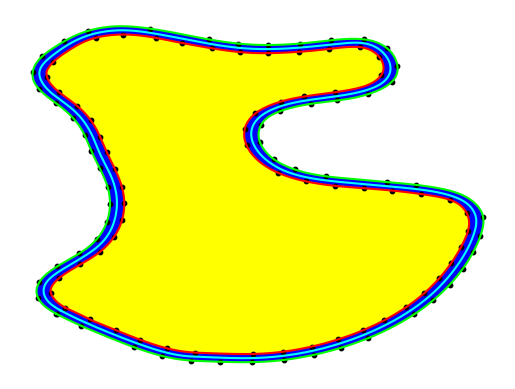

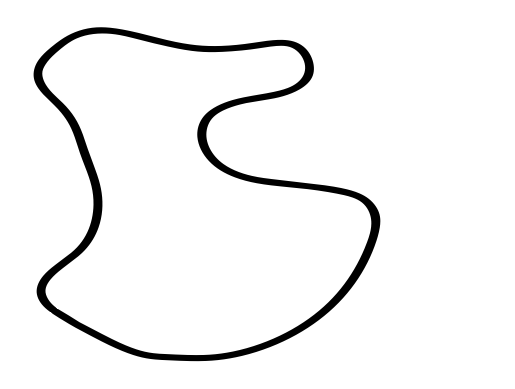

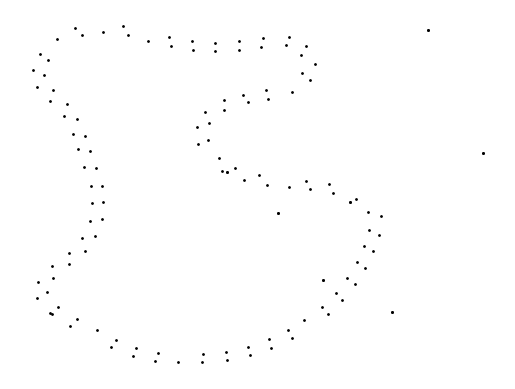

In [7]:
circuit_im, track_im, cones_im = sample.to_image()

### Saving circuit to csv file

In [8]:
sample.to_csv(false_cones=True, track_points=True)

### Generating a sample dataset of circuits as csv files in a path

In [9]:
from tilke import get_sample_csv

In [10]:
get_sample_csv(n=10, path="samples", contaminated=False)

100%|██████████| 10/10 [00:07<00:00,  1.25it/s]


## Detailed Usage

### Generating a Circuit

In [11]:
from tilke import Circuit

False

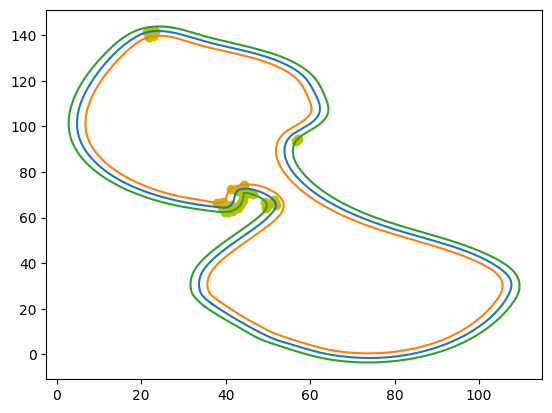

In [12]:
#fixed seed fixes a circuit but it might not be compliant with the restrictions
sample = Circuit(seed=1337)
sample.plot()
sample.restrictions_compliant

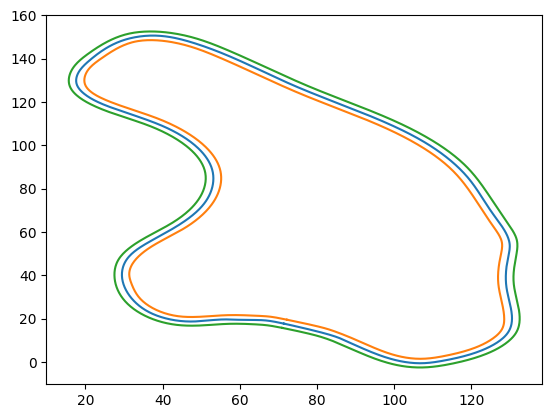

In [13]:
# we can specify circuit orientation (affects the order of the curves and cones) it is set to random by default
sample = Circuit(orientation="clockwise")
sample.plot()

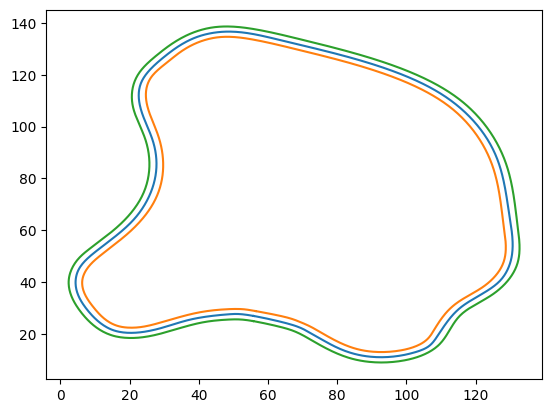

In [14]:
# defining a circuit with custom restrictions
from tilke import CircuitRestrictions

# a circuit has three curves: interior, exterior and middle
# there are two checking stages: curvature and distance
# we can specify the minimum curvature radius for each curve and each checking stage
custom_restrictions = CircuitRestrictions(
    min_curvature_radius_middle_curve=6.5,
    min_curvature_radius_interior_curve=4.5,
    min_curvature_radius_exterior_curve=8,
    stepsize_interior_curvature_checking=1.0,
    stepsize_exterior_curvature_checking=1.0,
    stepsize_middle_curvature_checking=1.0,
    stepsize_middle_distance_checking=1.0,
    stepsize_interior_distance_checking=1.0,
    stepsize_exterior_distance_checking=1.0,
    min_interior_exterior_distance=1.0,
    min_interior_middle_distance=1.0,
    min_exterior_middle_distance=1.0,
)

sample = Circuit(
    circuit_restrictions=custom_restrictions,
)
sample.plot()

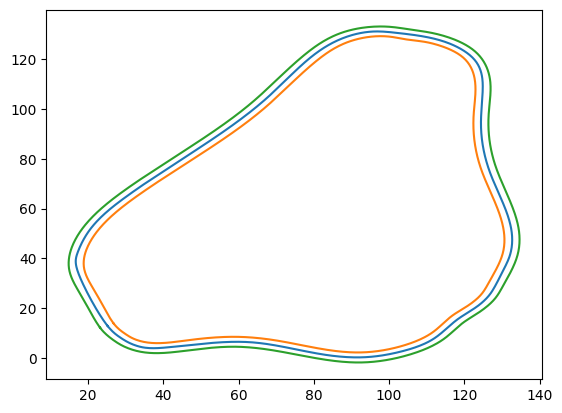

In [15]:
# defining a circuit with a custom generator
from tilke.CurveGenerator import BezierCurveGenerator

custom_generator = BezierCurveGenerator(
    num_control_points=8,
    radius_circle_control_points_generation=140.0,
    control_points_radius=0.5,
    control_points_edgy=0.05,
    seed=None,
    minimum_distance_between_control_points=None,
    curve_sampling_factor=10,
    smoothing_factor=0.5,
)

sample = Circuit(curve_generator=custom_generator)
sample.plot()

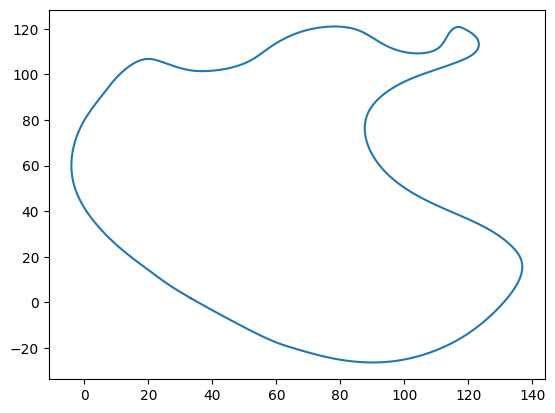

In [16]:
# or create a circuit from an existing middle curve
middle_curve = custom_generator.run()
middle_curve.plot()

False

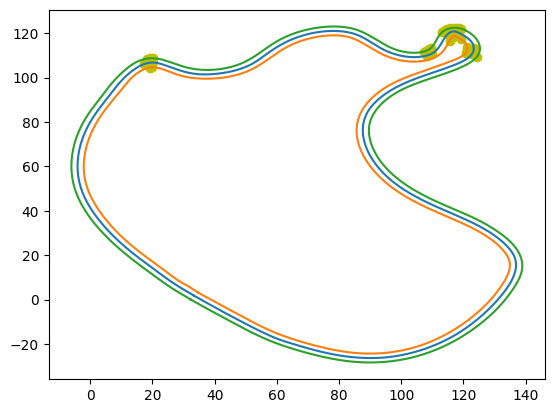

In [17]:
# if the circuit is created from a middle curve it will be checked but might not be compliant with the restrictions
sample_from_middle_curve = Circuit(middle_curve=middle_curve)
sample_from_middle_curve.plot()
sample_from_middle_curve.restrictions_compliant

### Generating Cone Populations

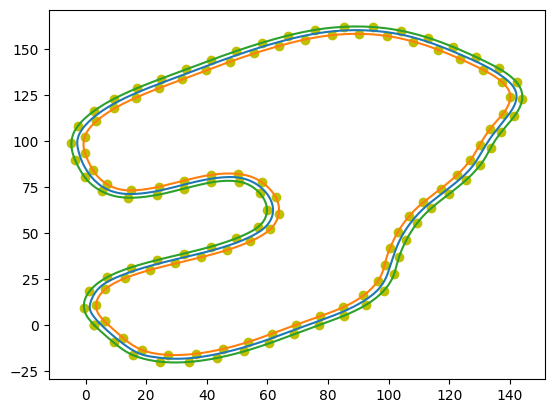

In [18]:
sample = Circuit()
sample.populate_circuit_naive()
sample.plot()

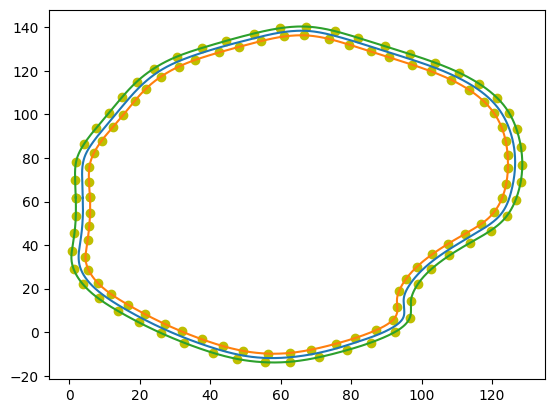

In [19]:
sample = Circuit()
sample.populate_circuit_random_number_cones()
sample.plot()

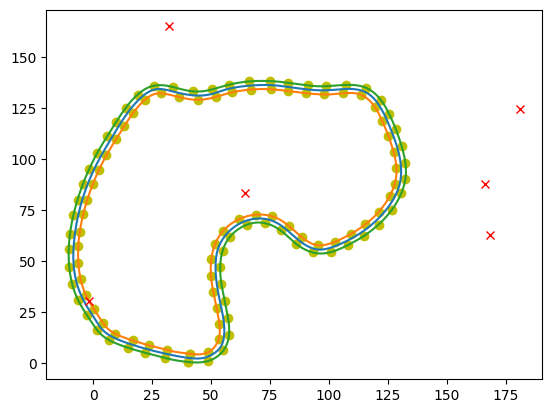

In [20]:
# you can also define custom cone population parameters
from tilke import ConePopulationParameters

custom_cone_population_parameters = ConePopulationParameters(
    total_number_cones_lower_bound=100,
    total_number_cones_upper_bound=120,
    minimum_proportion_cones_per_curve=0.5,
    total_number_cones=120,
    false_negative_probability=0.1,
    false_positive_probability=0.07,
    interior_curve_range_boost=0.025,
    exterior_curve_range_boost=0.025,
)

sample = Circuit(cone_population_parameters=custom_cone_population_parameters)
sample.populate_circuit()
sample.contaminate_cone_population()
sample.plot()